# Setup & Create Dataframe

In [3]:
import pyspark
from os import listdir
from os.path import isfile, join
import boto3
import pandas as pd
from sagemaker import get_execution_role
from pyspark.sql.types import LongType, StringType, StructField, StructType, BooleanType, ArrayType, IntegerType

In [6]:
conf = pyspark.SparkConf().setAppName('odl').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
sqlc = pyspark.sql.SQLContext(sc)

In [7]:
sc

<SparkContext master=local appName=odl>

In [8]:
sqlc

# Connect to S3

Read into spark dataframe from csv in s3

In [9]:
bucket='odl-spark19spds6003-001/az8ec'
data_key = 'small train.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)
pd.read_csv(data_location)

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,3122192,8e734531719810,a8785fd2ea8e8a,b96dc0a3b00157,0,0,0.000,0,0,0,...,0,0.0,0,0.000,0,0,106.2000,2,1534,0.1852
1,1017161,3b7812ee5113ee,ad20549a644158,b93b62206ba5c9,0,0,94.600,0,0,0,...,0,0.0,0,0.000,0,0,54.5900,2,0,0.1398
2,2798470,082a6625bbc903,939c620c490f3a,9fa21c873d8920,0,2,7.637,0,0,15,...,0,1432.0,0,16.850,0,0,1826.0000,4,1553,0.7857
3,2547638,4026a4acccec30,5b25d47aee68f6,b8ab417006cbdb,0,0,0.000,0,0,0,...,0,0.0,0,0.000,0,0,239.4000,1,1494,0.2500
4,1809751,4d5de6ea9f2014,cd54455844be55,8ea1892f92f507,1,3,56.990,0,0,1,...,0,2203.0,0,7.115,1,0,2587.0000,5,0,0.8776
5,3228917,dcd544c29ff3e3,fc4eaf6ad8c452,c75235743283df,2,2,295.800,4,1,3,...,2,0.0,0,0.000,0,0,1170.0000,3,0,0.6538
6,3511250,650b50ef4ef8b0,a49bf748974be6,cbf95b7774bcce,0,0,0.000,0,0,0,...,0,0.0,0,0.000,0,0,257.7000,3,1588,0.5263
7,2517815,7051b820444f67,0a48ec58e44a18,b4579387ccf5f7,1,5,405.100,3,2,9,...,1,4067.0,0,0.000,0,0,2146.0000,12,1554,0.8723
8,3091730,6924723338283a,22a47301208a1c,c5a1f942bd6e1f,0,0,0.000,0,0,0,...,0,0.0,0,0.000,0,0,0.0000,0,0,0.0000
9,2084897,bb65def40e8976,cdc887d0ba59af,bbc2c96fcc0121,0,0,0.000,0,0,0,...,0,0.0,0,0.000,0,0,9.6130,1,1525,0.0000


In [6]:
df = sqlc.createDataFrame(pd.read_csv(data_location))

In [43]:
print(df)

DataFrame[Unnamed: 0: bigint, Id: string, groupId: string, matchId: string, assists: bigint, boosts: bigint, damageDealt: double, DBNOs: bigint, headshotKills: bigint, heals: bigint, killPlace: bigint, killPoints: bigint, kills: bigint, killStreaks: bigint, longestKill: double, matchDuration: bigint, matchType: string, maxPlace: bigint, numGroups: bigint, rankPoints: bigint, revives: bigint, rideDistance: double, roadKills: bigint, swimDistance: double, teamKills: bigint, vehicleDestroys: bigint, walkDistance: double, weaponsAcquired: bigint, winPoints: bigint, winPlacePerc: double]


write parquet to s3

In [ ]:
parquetPath = '/home/ec2-user/SageMaker/az8ec'
df.write.parquet(parquetPath)

In [ ]:
# prep list of files to transfer
files = [f for f in listdir(parquetPath) if isfile(join(parquetPath, f))]

s3 = boto3.resource('s3')
for f in files:
    #print('copying {} to {}'.format(parquetPath+'/'+f,"sample_data/"+f))
    s3.Bucket(bucket).upload_file(parquetPath+'/'+f, "sample_data/pqt/"+f)

# ML pipeline

In [44]:
display(df)

DataFrame[Unnamed: 0: bigint, Id: string, groupId: string, matchId: string, assists: bigint, boosts: bigint, damageDealt: double, DBNOs: bigint, headshotKills: bigint, heals: bigint, killPlace: bigint, killPoints: bigint, kills: bigint, killStreaks: bigint, longestKill: double, matchDuration: bigint, matchType: string, maxPlace: bigint, numGroups: bigint, rankPoints: bigint, revives: bigint, rideDistance: double, roadKills: bigint, swimDistance: double, teamKills: bigint, vehicleDestroys: bigint, walkDistance: double, weaponsAcquired: bigint, winPoints: bigint, winPlacePerc: double]

In [45]:
df.printSchema()

root
 |-- Unnamed: 0: long (nullable = true)
 |-- Id: string (nullable = true)
 |-- groupId: string (nullable = true)
 |-- matchId: string (nullable = true)
 |-- assists: long (nullable = true)
 |-- boosts: long (nullable = true)
 |-- damageDealt: double (nullable = true)
 |-- DBNOs: long (nullable = true)
 |-- headshotKills: long (nullable = true)
 |-- heals: long (nullable = true)
 |-- killPlace: long (nullable = true)
 |-- killPoints: long (nullable = true)
 |-- kills: long (nullable = true)
 |-- killStreaks: long (nullable = true)
 |-- longestKill: double (nullable = true)
 |-- matchDuration: long (nullable = true)
 |-- matchType: string (nullable = true)
 |-- maxPlace: long (nullable = true)
 |-- numGroups: long (nullable = true)
 |-- rankPoints: long (nullable = true)
 |-- revives: long (nullable = true)
 |-- rideDistance: double (nullable = true)
 |-- roadKills: long (nullable = true)
 |-- swimDistance: double (nullable = true)
 |-- teamKills: long (nullable = true)
 |-- vehicle

exam correlation

In [46]:
print("Pearson's r(killPlace, killPoints) = {}".format(df.corr("killPlace", "killPoints")))
print("Pearson's r(killPlace,kills) = {}".format(df.corr("killPlace", "kills")))
print("Pearson's r(killPlace,killStreaks) = {}".format(df.corr("killPlace", "killStreaks")))
print("Pearson's r(killPlace, longestKill) = {}".format(df.corr("killPlace", "longestKill")))

Pearson's r(killPlace, killPoints) = -0.023622686705187333
Pearson's r(killPlace,kills) = -0.7275175110837984
Pearson's r(killPlace,killStreaks) = -0.8102706832754168
Pearson's r(killPlace, longestKill) = -0.5398218318082464


select variables and split data

In [62]:
df=df.select("killPoints", "winPoints")

In [63]:
seed = 42
(testDF, trainingDF) = df.randomSplit((0.20, 0.80), seed=seed)
print ('training set N = {}, test set N = {}'.format(trainingDF.count(),testDF.count()))

training set N = 355793, test set N = 88903


# Vectorization

In [26]:
from pyspark.ml.linalg import Vectors, VectorUDT

In [64]:
sqlc.registerFunction("oneElementVec", lambda d: Vectors.dense([d]), returnType=VectorUDT())
trainingDF = trainingDF.selectExpr("killPoints", "oneElementVec(winPoints) as winPoints")
testDF = testDF.selectExpr("killPoints", "oneElementVec(winPoints) as winPoints")

print(testDF.orderBy(testDF.killPoints.desc()).limit(5))

DataFrame[killPoints: bigint, winPoints: vector]


In [65]:
trainingDF = trainingDF.withColumnRenamed("killPoints", "label").withColumnRenamed("winPoints", "features")
testDF = testDF.withColumnRenamed("killPoints", "label").withColumnRenamed("winPoints", "features")

# Train model and predict

In [66]:
from pyspark.ml.regression import LinearRegression, LinearRegressionModel
lr = LinearRegression()
lrModel = lr.fit(trainingDF)

In [36]:
type(lrModel)

pyspark.ml.regression.LinearRegressionModel

In [67]:
predictionsAndLabelsDF = lrModel.transform(testDF)
print(predictionsAndLabelsDF.orderBy(predictionsAndLabelsDF.label.desc()).take(5))

[Row(label=2087, features=DenseVector([1648.0]), prediction=1374.1915172037473), Row(label=2041, features=DenseVector([1605.0]), prediction=1338.3113244924616), Row(label=2017, features=DenseVector([1610.0]), prediction=1342.4834399240065), Row(label=2001, features=DenseVector([1701.0]), prediction=1418.4159407781226), Row(label=1973, features=DenseVector([1604.0]), prediction=1337.4769014061526)]


# Model Evaluation

In [38]:
from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator()
print(eval.explainParams())

labelCol: label column name. (default: label)
metricName: metric name in evaluation - one of:
                       rmse - root mean squared error (default)
                       mse - mean squared error
                       r2 - r^2 metric
                       mae - mean absolute error. (default: rmse)
predictionCol: prediction column name. (default: prediction)


In [68]:
eval.setMetricName("rmse").evaluate(predictionsAndLabelsDF)

113.89750531590906

In [69]:
eval.setMetricName("r2").evaluate(predictionsAndLabelsDF)

0.9671692046448915

# Visualization

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df = pd.DataFrame(data = pd.read_csv(data_location))

In [11]:
print(df)

        Unnamed: 0              Id         groupId         matchId  assists  \
0          3122192  8e734531719810  a8785fd2ea8e8a  b96dc0a3b00157        0   
1          1017161  3b7812ee5113ee  ad20549a644158  b93b62206ba5c9        0   
2          2798470  082a6625bbc903  939c620c490f3a  9fa21c873d8920        0   
3          2547638  4026a4acccec30  5b25d47aee68f6  b8ab417006cbdb        0   
4          1809751  4d5de6ea9f2014  cd54455844be55  8ea1892f92f507        1   
5          3228917  dcd544c29ff3e3  fc4eaf6ad8c452  c75235743283df        2   
6          3511250  650b50ef4ef8b0  a49bf748974be6  cbf95b7774bcce        0   
7          2517815  7051b820444f67  0a48ec58e44a18  b4579387ccf5f7        1   
8          3091730  6924723338283a  22a47301208a1c  c5a1f942bd6e1f        0   
9          2084897  bb65def40e8976  cdc887d0ba59af  bbc2c96fcc0121        0   
10         2509644  4e18d661c816b0  4a3c185c680799  3adccfc77ce1d2        0   
11         2298566  4c279ba660b640  08f164a2709240  

In [12]:
df_subset=df.sample(n=10000)

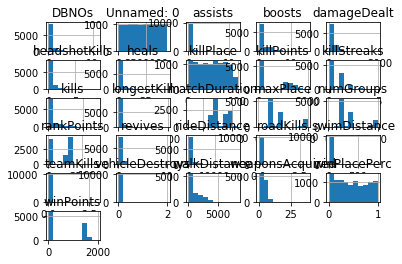

In [13]:
df_subset.hist()
plt.show()

In [ ]:
df_subset.plot(kind='density', subplots=True, layout=(30,30), sharex=False)
plt.show()